In [1]:
import h5py
import scipy.io as io
import PIL.Image as Image
import numpy as np
import os
import glob
from matplotlib import pyplot as plt
from scipy.ndimage.filters import gaussian_filter 
import scipy
import json
from matplotlib import cm as CM
from image import *
from model import CSRNet
import torch
%matplotlib inline

In [2]:
#this is borrowed from https://github.com/davideverona/deep-crowd-counting_crowdnet
def gaussian_filter_density(gt):
    print gt.shape
    density = np.zeros(gt.shape, dtype=np.float32)
    gt_count = np.count_nonzero(gt)
    if gt_count == 0:
        return density

    pts = np.array(zip(np.nonzero(gt)[1], np.nonzero(gt)[0]))
    leafsize = 2048
    # build kdtree
    tree = scipy.spatial.KDTree(pts.copy(), leafsize=leafsize)
    # query kdtree
    distances, locations = tree.query(pts, k=4)

    print 'generate density...'
    for i, pt in enumerate(pts):
        pt2d = np.zeros(gt.shape, dtype=np.float32)
        pt2d[pt[1],pt[0]] = 1.
        if gt_count > 1:
            sigma = (distances[i][1]+distances[i][2]+distances[i][3])*0.1
        else:
            sigma = np.average(np.array(gt.shape))/2./2. #case: 1 point
        density += scipy.ndimage.filters.gaussian_filter(pt2d, sigma, mode='constant')
    print 'done.'
    return density

In [3]:
#set the root to the Shanghai dataset you download
root = '/content/CSRNet-pytorch/'

In [4]:
#now generate the ShanghaiA's ground truth
part_A_train = os.path.join(root,'part_A_final/train_data','images')
part_A_test = os.path.join(root,'part_A_final/test_data','images')
part_B_train = os.path.join(root,'part_B_final/train_data','images')
part_B_test = os.path.join(root,'part_B_final/test_data','images')
path_sets = [part_A_train,part_A_test]

In [5]:
img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths.append(img_path)

In [6]:
for img_path in img_paths:
    print img_path
    mat = io.loadmat(img_path.replace('.jpg','.mat').replace('images','ground_truth').replace('IMG_','GT_IMG_'))
    img= plt.imread(img_path)
    k = np.zeros((img.shape[0],img.shape[1]))
    gt = mat["image_info"][0,0][0,0][0]
    for i in range(0,len(gt)):
        if int(gt[i][1])<img.shape[0] and int(gt[i][0])<img.shape[1]:
            k[int(gt[i][1]),int(gt[i][0])]=1
    k = gaussian_filter_density(k)
    with h5py.File(img_path.replace('.jpg','.h5').replace('images','ground_truth'), 'w') as hf:
            hf['density'] = k

/home/caradmin/space/CSRNet-pytorch/part_A_final/train_data/images/IMG_264.jpg
(576, 1024)
generate density...
done.
/home/caradmin/space/CSRNet-pytorch/part_A_final/train_data/images/IMG_214.jpg
(359, 329)
generate density...
done.
/home/caradmin/space/CSRNet-pytorch/part_A_final/train_data/images/IMG_17.jpg
(478, 600)
generate density...
done.
/home/caradmin/space/CSRNet-pytorch/part_A_final/train_data/images/IMG_262.jpg
(576, 1024)
generate density...
done.
/home/caradmin/space/CSRNet-pytorch/part_A_final/train_data/images/IMG_276.jpg
(768, 1024)
generate density...
done.
/home/caradmin/space/CSRNet-pytorch/part_A_final/train_data/images/IMG_41.jpg
(683, 1024)
generate density...
done.
/home/caradmin/space/CSRNet-pytorch/part_A_final/train_data/images/IMG_30.jpg
(645, 1024)
generate density...
done.
/home/caradmin/space/CSRNet-pytorch/part_A_final/train_data/images/IMG_7.jpg
(590, 1024)
generate density...
done.
/home/caradmin/space/CSRNet-pytorch/part_A_final/train_data/images/IMG_

done.
/home/caradmin/space/CSRNet-pytorch/part_A_final/train_data/images/IMG_229.jpg
(430, 620)
generate density...
done.
/home/caradmin/space/CSRNet-pytorch/part_A_final/train_data/images/IMG_57.jpg
(1024, 1024)
generate density...
done.
/home/caradmin/space/CSRNet-pytorch/part_A_final/train_data/images/IMG_130.jpg
(680, 1024)
generate density...
done.
/home/caradmin/space/CSRNet-pytorch/part_A_final/train_data/images/IMG_141.jpg
(427, 640)
generate density...
done.
/home/caradmin/space/CSRNet-pytorch/part_A_final/train_data/images/IMG_18.jpg
(793, 1024)
generate density...
done.
/home/caradmin/space/CSRNet-pytorch/part_A_final/train_data/images/IMG_196.jpg
(684, 1024)
generate density...
done.
/home/caradmin/space/CSRNet-pytorch/part_A_final/train_data/images/IMG_254.jpg
(683, 1024)
generate density...
done.
/home/caradmin/space/CSRNet-pytorch/part_A_final/train_data/images/IMG_38.jpg
(566, 1024)
generate density...
done.
/home/caradmin/space/CSRNet-pytorch/part_A_final/train_data/im

done.
/home/caradmin/space/CSRNet-pytorch/part_A_final/train_data/images/IMG_275.jpg
(270, 360)
generate density...
done.
/home/caradmin/space/CSRNet-pytorch/part_A_final/train_data/images/IMG_132.jpg
(800, 600)
generate density...
done.
/home/caradmin/space/CSRNet-pytorch/part_A_final/train_data/images/IMG_230.jpg
(418, 628)
generate density...
done.
/home/caradmin/space/CSRNet-pytorch/part_A_final/train_data/images/IMG_216.jpg
(293, 442)
generate density...
done.
/home/caradmin/space/CSRNet-pytorch/part_A_final/train_data/images/IMG_64.jpg
(768, 1024)
generate density...
done.
/home/caradmin/space/CSRNet-pytorch/part_A_final/train_data/images/IMG_54.jpg
(564, 832)
generate density...
done.
/home/caradmin/space/CSRNet-pytorch/part_A_final/train_data/images/IMG_277.jpg
(692, 1024)
generate density...
done.
/home/caradmin/space/CSRNet-pytorch/part_A_final/train_data/images/IMG_44.jpg
(683, 1024)
generate density...
done.
/home/caradmin/space/CSRNet-pytorch/part_A_final/train_data/images

done.
/home/caradmin/space/CSRNet-pytorch/part_A_final/train_data/images/IMG_90.jpg
(576, 1024)
generate density...
done.
/home/caradmin/space/CSRNet-pytorch/part_A_final/train_data/images/IMG_258.jpg
(768, 1024)
generate density...
done.
/home/caradmin/space/CSRNet-pytorch/part_A_final/train_data/images/IMG_251.jpg
(661, 1024)
generate density...
done.
/home/caradmin/space/CSRNet-pytorch/part_A_final/train_data/images/IMG_231.jpg
(682, 1024)
generate density...
done.
/home/caradmin/space/CSRNet-pytorch/part_A_final/train_data/images/IMG_273.jpg
(598, 1024)
generate density...
done.
/home/caradmin/space/CSRNet-pytorch/part_A_final/train_data/images/IMG_98.jpg
(512, 1024)
generate density...
done.
/home/caradmin/space/CSRNet-pytorch/part_A_final/train_data/images/IMG_122.jpg
(787, 1024)
generate density...
done.
/home/caradmin/space/CSRNet-pytorch/part_A_final/train_data/images/IMG_197.jpg
(600, 800)
generate density...
done.
/home/caradmin/space/CSRNet-pytorch/part_A_final/train_data/i

done.
/home/caradmin/space/CSRNet-pytorch/part_A_final/train_data/images/IMG_284.jpg
(768, 1024)
generate density...
done.
/home/caradmin/space/CSRNet-pytorch/part_A_final/train_data/images/IMG_256.jpg
(576, 1024)
generate density...
done.
/home/caradmin/space/CSRNet-pytorch/part_A_final/train_data/images/IMG_250.jpg
(681, 1024)
generate density...
done.
/home/caradmin/space/CSRNet-pytorch/part_A_final/train_data/images/IMG_77.jpg
(684, 1024)
generate density...
done.
/home/caradmin/space/CSRNet-pytorch/part_A_final/train_data/images/IMG_182.jpg
(680, 1024)
generate density...
done.
/home/caradmin/space/CSRNet-pytorch/part_A_final/train_data/images/IMG_222.jpg
(522, 1024)
generate density...
done.
/home/caradmin/space/CSRNet-pytorch/part_A_final/train_data/images/IMG_176.jpg
(380, 594)
generate density...
done.
/home/caradmin/space/CSRNet-pytorch/part_A_final/train_data/images/IMG_52.jpg
(768, 1024)
generate density...
done.
/home/caradmin/space/CSRNet-pytorch/part_A_final/train_data/i

done.
/home/caradmin/space/CSRNet-pytorch/part_A_final/test_data/images/IMG_137.jpg
(299, 449)
generate density...
done.
/home/caradmin/space/CSRNet-pytorch/part_A_final/test_data/images/IMG_154.jpg
(324, 1024)
generate density...
done.
/home/caradmin/space/CSRNet-pytorch/part_A_final/test_data/images/IMG_100.jpg
(409, 902)
generate density...
done.
/home/caradmin/space/CSRNet-pytorch/part_A_final/test_data/images/IMG_48.jpg
(533, 1024)
generate density...
done.
/home/caradmin/space/CSRNet-pytorch/part_A_final/test_data/images/IMG_32.jpg
(683, 1024)
generate density...
done.
/home/caradmin/space/CSRNet-pytorch/part_A_final/test_data/images/IMG_13.jpg
(587, 1024)
generate density...
done.
/home/caradmin/space/CSRNet-pytorch/part_A_final/test_data/images/IMG_145.jpg
(367, 1024)
generate density...
done.
/home/caradmin/space/CSRNet-pytorch/part_A_final/test_data/images/IMG_5.jpg
(768, 1024)
generate density...
done.
/home/caradmin/space/CSRNet-pytorch/part_A_final/test_data/images/IMG_126

done.
/home/caradmin/space/CSRNet-pytorch/part_A_final/test_data/images/IMG_37.jpg
(669, 1000)
generate density...
done.
/home/caradmin/space/CSRNet-pytorch/part_A_final/test_data/images/IMG_74.jpg
(742, 1024)
generate density...
done.
/home/caradmin/space/CSRNet-pytorch/part_A_final/test_data/images/IMG_1.jpg
(704, 1024)
generate density...
done.
/home/caradmin/space/CSRNet-pytorch/part_A_final/test_data/images/IMG_157.jpg
(676, 1024)
generate density...
done.
/home/caradmin/space/CSRNet-pytorch/part_A_final/test_data/images/IMG_90.jpg
(457, 1024)
generate density...
done.
/home/caradmin/space/CSRNet-pytorch/part_A_final/test_data/images/IMG_98.jpg
(373, 561)
generate density...
done.
/home/caradmin/space/CSRNet-pytorch/part_A_final/test_data/images/IMG_122.jpg
(760, 1024)
generate density...
done.
/home/caradmin/space/CSRNet-pytorch/part_A_final/test_data/images/IMG_46.jpg
(680, 1024)
generate density...
done.
/home/caradmin/space/CSRNet-pytorch/part_A_final/test_data/images/IMG_94.j

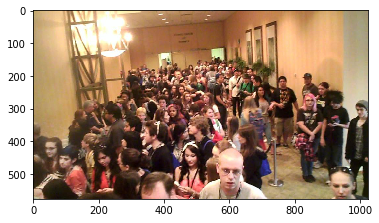

In [7]:
#now see a sample from ShanghaiA
plt.imshow(Image.open(img_paths[0]))

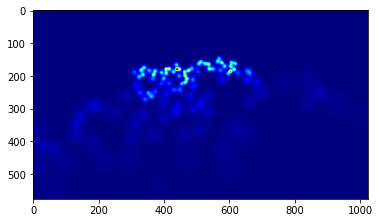

In [8]:
gt_file = h5py.File(img_paths[0].replace('.jpg','.h5').replace('images','ground_truth'),'r')
groundtruth = np.asarray(gt_file['density'])
plt.imshow(groundtruth,cmap=CM.jet)

In [9]:
np.sum(groundtruth)# don't mind this slight variation

107.33089

In [10]:
#now generate the ShanghaiB's ground truth
path_sets = [part_B_train,part_B_test]

In [11]:
img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths.append(img_path)

In [12]:
for img_path in img_paths:
    print img_path
    mat = io.loadmat(img_path.replace('.jpg','.mat').replace('images','ground_truth').replace('IMG_','GT_IMG_'))
    img= plt.imread(img_path)
    k = np.zeros((img.shape[0],img.shape[1]))
    gt = mat["image_info"][0,0][0,0][0]
    for i in range(0,len(gt)):
        if int(gt[i][1])<img.shape[0] and int(gt[i][0])<img.shape[1]:
            k[int(gt[i][1]),int(gt[i][0])]=1
    k = gaussian_filter(k,15)
    with h5py.File(img_path.replace('.jpg','.h5').replace('images','ground_truth'), 'w') as hf:
            hf['density'] = k

/home/caradmin/space/CSRNet-pytorch/part_B_final/train_data/images/IMG_264.jpg
/home/caradmin/space/CSRNet-pytorch/part_B_final/train_data/images/IMG_214.jpg
/home/caradmin/space/CSRNet-pytorch/part_B_final/train_data/images/IMG_369.jpg
/home/caradmin/space/CSRNet-pytorch/part_B_final/train_data/images/IMG_303.jpg
/home/caradmin/space/CSRNet-pytorch/part_B_final/train_data/images/IMG_17.jpg
/home/caradmin/space/CSRNet-pytorch/part_B_final/train_data/images/IMG_262.jpg
/home/caradmin/space/CSRNet-pytorch/part_B_final/train_data/images/IMG_276.jpg
/home/caradmin/space/CSRNet-pytorch/part_B_final/train_data/images/IMG_41.jpg
/home/caradmin/space/CSRNet-pytorch/part_B_final/train_data/images/IMG_30.jpg
/home/caradmin/space/CSRNet-pytorch/part_B_final/train_data/images/IMG_7.jpg
/home/caradmin/space/CSRNet-pytorch/part_B_final/train_data/images/IMG_252.jpg
/home/caradmin/space/CSRNet-pytorch/part_B_final/train_data/images/IMG_21.jpg
/home/caradmin/space/CSRNet-pytorch/part_B_final/train_dat

/home/caradmin/space/CSRNet-pytorch/part_B_final/train_data/images/IMG_301.jpg
/home/caradmin/space/CSRNet-pytorch/part_B_final/train_data/images/IMG_198.jpg
/home/caradmin/space/CSRNet-pytorch/part_B_final/train_data/images/IMG_40.jpg
/home/caradmin/space/CSRNet-pytorch/part_B_final/train_data/images/IMG_149.jpg
/home/caradmin/space/CSRNet-pytorch/part_B_final/train_data/images/IMG_283.jpg
/home/caradmin/space/CSRNet-pytorch/part_B_final/train_data/images/IMG_115.jpg
/home/caradmin/space/CSRNet-pytorch/part_B_final/train_data/images/IMG_140.jpg
/home/caradmin/space/CSRNet-pytorch/part_B_final/train_data/images/IMG_213.jpg
/home/caradmin/space/CSRNet-pytorch/part_B_final/train_data/images/IMG_248.jpg
/home/caradmin/space/CSRNet-pytorch/part_B_final/train_data/images/IMG_299.jpg
/home/caradmin/space/CSRNet-pytorch/part_B_final/train_data/images/IMG_168.jpg
/home/caradmin/space/CSRNet-pytorch/part_B_final/train_data/images/IMG_239.jpg
/home/caradmin/space/CSRNet-pytorch/part_B_final/trai

/home/caradmin/space/CSRNet-pytorch/part_B_final/train_data/images/IMG_305.jpg
/home/caradmin/space/CSRNet-pytorch/part_B_final/train_data/images/IMG_371.jpg
/home/caradmin/space/CSRNet-pytorch/part_B_final/train_data/images/IMG_83.jpg
/home/caradmin/space/CSRNet-pytorch/part_B_final/train_data/images/IMG_163.jpg
/home/caradmin/space/CSRNet-pytorch/part_B_final/train_data/images/IMG_361.jpg
/home/caradmin/space/CSRNet-pytorch/part_B_final/train_data/images/IMG_61.jpg
/home/caradmin/space/CSRNet-pytorch/part_B_final/train_data/images/IMG_381.jpg
/home/caradmin/space/CSRNet-pytorch/part_B_final/train_data/images/IMG_298.jpg
/home/caradmin/space/CSRNet-pytorch/part_B_final/train_data/images/IMG_124.jpg
/home/caradmin/space/CSRNet-pytorch/part_B_final/train_data/images/IMG_31.jpg
/home/caradmin/space/CSRNet-pytorch/part_B_final/train_data/images/IMG_370.jpg
/home/caradmin/space/CSRNet-pytorch/part_B_final/train_data/images/IMG_267.jpg
/home/caradmin/space/CSRNet-pytorch/part_B_final/train_

/home/caradmin/space/CSRNet-pytorch/part_B_final/train_data/images/IMG_138.jpg
/home/caradmin/space/CSRNet-pytorch/part_B_final/train_data/images/IMG_173.jpg
/home/caradmin/space/CSRNet-pytorch/part_B_final/train_data/images/IMG_192.jpg
/home/caradmin/space/CSRNet-pytorch/part_B_final/train_data/images/IMG_35.jpg
/home/caradmin/space/CSRNet-pytorch/part_B_final/train_data/images/IMG_33.jpg
/home/caradmin/space/CSRNet-pytorch/part_B_final/train_data/images/IMG_146.jpg
/home/caradmin/space/CSRNet-pytorch/part_B_final/train_data/images/IMG_86.jpg
/home/caradmin/space/CSRNet-pytorch/part_B_final/train_data/images/IMG_315.jpg
/home/caradmin/space/CSRNet-pytorch/part_B_final/train_data/images/IMG_91.jpg
/home/caradmin/space/CSRNet-pytorch/part_B_final/train_data/images/IMG_195.jpg
/home/caradmin/space/CSRNet-pytorch/part_B_final/train_data/images/IMG_356.jpg
/home/caradmin/space/CSRNet-pytorch/part_B_final/train_data/images/IMG_391.jpg
/home/caradmin/space/CSRNet-pytorch/part_B_final/train_d

/home/caradmin/space/CSRNet-pytorch/part_B_final/test_data/images/IMG_47.jpg
/home/caradmin/space/CSRNet-pytorch/part_B_final/test_data/images/IMG_59.jpg
/home/caradmin/space/CSRNet-pytorch/part_B_final/test_data/images/IMG_189.jpg
/home/caradmin/space/CSRNet-pytorch/part_B_final/test_data/images/IMG_226.jpg
/home/caradmin/space/CSRNet-pytorch/part_B_final/test_data/images/IMG_81.jpg
/home/caradmin/space/CSRNet-pytorch/part_B_final/test_data/images/IMG_205.jpg
/home/caradmin/space/CSRNet-pytorch/part_B_final/test_data/images/IMG_104.jpg
/home/caradmin/space/CSRNet-pytorch/part_B_final/test_data/images/IMG_265.jpg
/home/caradmin/space/CSRNet-pytorch/part_B_final/test_data/images/IMG_139.jpg
/home/caradmin/space/CSRNet-pytorch/part_B_final/test_data/images/IMG_194.jpg
/home/caradmin/space/CSRNet-pytorch/part_B_final/test_data/images/IMG_58.jpg
/home/caradmin/space/CSRNet-pytorch/part_B_final/test_data/images/IMG_244.jpg
/home/caradmin/space/CSRNet-pytorch/part_B_final/test_data/images/IM

/home/caradmin/space/CSRNet-pytorch/part_B_final/test_data/images/IMG_224.jpg
/home/caradmin/space/CSRNet-pytorch/part_B_final/test_data/images/IMG_304.jpg
/home/caradmin/space/CSRNet-pytorch/part_B_final/test_data/images/IMG_281.jpg
/home/caradmin/space/CSRNet-pytorch/part_B_final/test_data/images/IMG_165.jpg
/home/caradmin/space/CSRNet-pytorch/part_B_final/test_data/images/IMG_113.jpg
/home/caradmin/space/CSRNet-pytorch/part_B_final/test_data/images/IMG_167.jpg
/home/caradmin/space/CSRNet-pytorch/part_B_final/test_data/images/IMG_73.jpg
/home/caradmin/space/CSRNet-pytorch/part_B_final/test_data/images/IMG_278.jpg
/home/caradmin/space/CSRNet-pytorch/part_B_final/test_data/images/IMG_162.jpg
/home/caradmin/space/CSRNet-pytorch/part_B_final/test_data/images/IMG_259.jpg
/home/caradmin/space/CSRNet-pytorch/part_B_final/test_data/images/IMG_160.jpg
/home/caradmin/space/CSRNet-pytorch/part_B_final/test_data/images/IMG_202.jpg
/home/caradmin/space/CSRNet-pytorch/part_B_final/test_data/images

/home/caradmin/space/CSRNet-pytorch/part_B_final/test_data/images/IMG_201.jpg
/home/caradmin/space/CSRNet-pytorch/part_B_final/test_data/images/IMG_271.jpg
/home/caradmin/space/CSRNet-pytorch/part_B_final/test_data/images/IMG_204.jpg
/home/caradmin/space/CSRNet-pytorch/part_B_final/test_data/images/IMG_257.jpg
/home/caradmin/space/CSRNet-pytorch/part_B_final/test_data/images/IMG_289.jpg
/home/caradmin/space/CSRNet-pytorch/part_B_final/test_data/images/IMG_80.jpg
/home/caradmin/space/CSRNet-pytorch/part_B_final/test_data/images/IMG_300.jpg
/home/caradmin/space/CSRNet-pytorch/part_B_final/test_data/images/IMG_175.jpg
/home/caradmin/space/CSRNet-pytorch/part_B_final/test_data/images/IMG_296.jpg
/home/caradmin/space/CSRNet-pytorch/part_B_final/test_data/images/IMG_89.jpg
/home/caradmin/space/CSRNet-pytorch/part_B_final/test_data/images/IMG_50.jpg
/home/caradmin/space/CSRNet-pytorch/part_B_final/test_data/images/IMG_185.jpg
/home/caradmin/space/CSRNet-pytorch/part_B_final/test_data/images/I